This project aims to evaluate data from various AirBnB users' travel planning behaviour. The data set can be found at.
The dataset can be found at https://www.kaggle.com/competitions/airbnb-recruiting-new-user-bookings

# machine-learning-project

Use the "Run" button to execute the code.

## Importing libraries and Downloading the dataset

In [255]:
!pip install jovian --upgrade --quiet

In [256]:
import jovian

In [257]:
!pip install opendatasets --upgrade --quiet

In [258]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [259]:
od.download('https://www.kaggle.com/competitions/airbnb-recruiting-new-user-bookings')

Skipping, found downloaded files in "./airbnb-recruiting-new-user-bookings" (use force=True to force download)


In [260]:
data_dir='./airbnb-recruiting-new-user-bookings'

In [261]:
import os

In [262]:
os.listdir(data_dir)

['test_users.csv.zip',
 'age_gender_bkts.csv.zip',
 'sessions.csv.zip',
 'countries.csv.zip',
 'sample_submission_NDF.csv.zip',
 'train_users_2.csv.zip']

In [263]:
data_csv= data_dir + '/train_users_2.csv.zip'

In [264]:
df= pd.read_csv(data_csv)

The dataset has been downloaded and extracted.

In [265]:
df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [266]:
df = df.replace(r'^\s*$', np.nan, regex=True)

Python does not recognise the empty space in csv files which may give error upon execution . Above code has been used to avoid 

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

It is evident that 'date_first_booking' and 'first_affiliate_tracked' columns have some null values but first let's look at the columns which may have absurd values

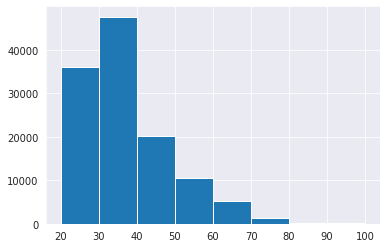

In [268]:
plt.hist(df.age, bins=[20,30,40,50,60,70,80,90,100]);

In [269]:
df.age.value_counts()

30.0      6124
31.0      6016
29.0      5963
28.0      5939
32.0      5855
          ... 
1925.0       1
1935.0       1
1933.0       1
112.0        1
1926.0       1
Name: age, Length: 127, dtype: int64

As you can see, the age column has numbers greater than 100, hence we are unable to use them as input. As a result, the user's age has a maximum and lower restriction of 80 and 10, respectively.

In [270]:
age_index=df[df['age']>80].index
age_index1=df[df['age']<10].index
df.drop(labels=age_index,inplace=True)
df.drop(labels=age_index1,inplace=True)

In [271]:
df.describe()

,timestamp_first_active,age,signup_flow
count,2.106230e+05,122633.000000,210623.000000
mean,2.013087e+13,36.373578,3.287295
std,9.241394e+09,11.272302,7.659450
min,2.009032e+13,15.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,33.000000,0.000000
75%,2.014031e+13,42.000000,0.000000
max,2.014063e+13,80.000000,25.000000


Then we fill the missing values with median of the column. Median is choosen instead of mean cause it is unaffected by the presence of outliers which influences our model's predictions

In [272]:
new_df= df.fillna({'age': df['age'].median()})

In [273]:
new_df.age.describe()

count    210623.000000
mean         34.964230
std           8.760717
min          15.000000
25%          32.000000
50%          33.000000
75%          35.000000
max          80.000000
Name: age, dtype: float64

In [274]:
new_df.gender.unique()

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

we do the same thing with 'gender' column but here mode is chosen

(array([94932.,     0.,     0., 53548.,     0.,     0., 61864.,     0.,
            0.,   279.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

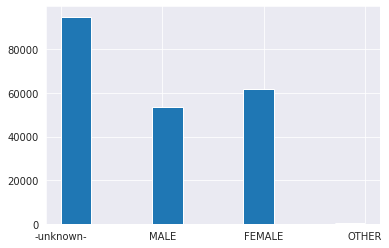

In [275]:
plt.hist(new_df.gender)

In [276]:
new_df['gender'].replace(['-unknown-'],'FEMALE' , inplace=True)

In [277]:
new_df.gender.describe()

count     210623
unique         3
top       FEMALE
freq      156796
Name: gender, dtype: object

In [278]:
new_df.country_destination.unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

We cannot train the model which has does not have labels so we remove them from the training dataset

In [279]:
ndf_index=new_df[new_df['country_destination']=='NDF'].index
new_df.drop(labels=ndf_index,inplace=True)

In [280]:
new_df.country_destination.describe()

count     87443
unique       11
top          US
freq      61362
Name: country_destination, dtype: object

In [281]:
ndf_index=new_df[new_df['country_destination']=='other'].index
new_df.drop(labels=ndf_index,inplace=True)

In [282]:
new_df.country_destination.describe()

count     77534
unique       10
top          US
freq      61362
Name: country_destination, dtype: object

In [283]:
jovian.commit(project="machine-learning-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


Committed successfully! https://jovian.ai/dibyababu105/machine-learning-project


'https://jovian.ai/dibyababu105/machine-learning-project'

In [284]:
new_df.country_destination.unique()

array(['US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL', 'DE', 'AU'],
      dtype=object)

## **Data Visualisation**

In [285]:
import matplotlib

In [286]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'no of bookings in respective countries')

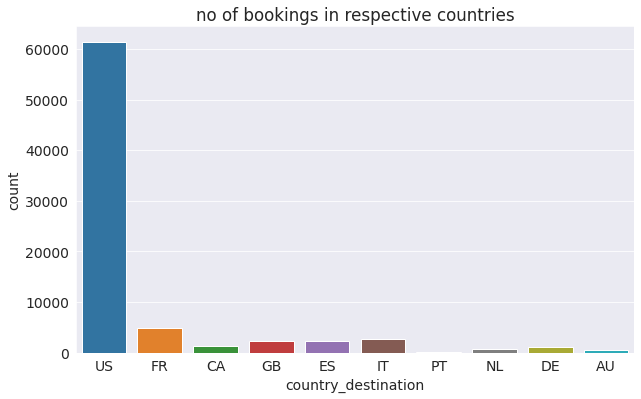

In [287]:
sns.countplot(new_df.country_destination, x='country_destination');
plt.title('no of bookings in respective countries')

US is the most preferred destination

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'gender distribution')

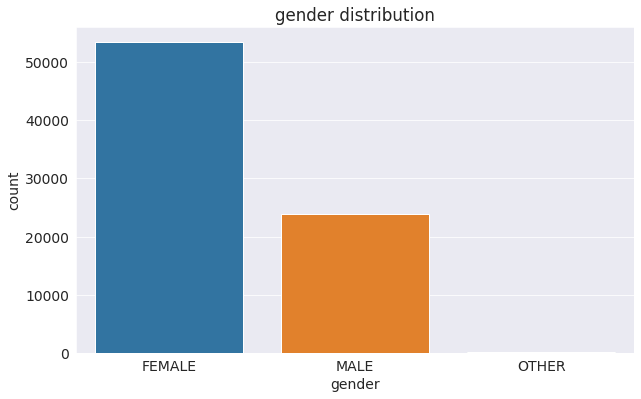

In [288]:
sns.countplot(new_df.gender, x='gender')
plt.title('gender distribution')

In [289]:
new_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,FEMALE,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,FEMALE,33.0,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,7plqriggxp,2014-06-30,20140630230136,2014-06-30,FEMALE,55.0,basic,0,en,sem-brand,google,omg,Web,Android Tablet,IE,FR
213439,msucfwmlzc,2014-06-30,20140630234729,2015-03-16,MALE,43.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US
213441,omlc9iku7t,2014-06-30,20140630235151,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213443,0k26r3mir0,2014-06-30,20140630235340,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


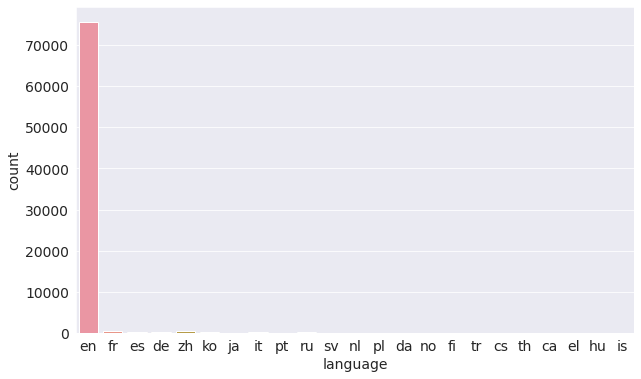

In [290]:
sns.countplot(new_df.language, x='language')

English is the most spoken language among the users 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


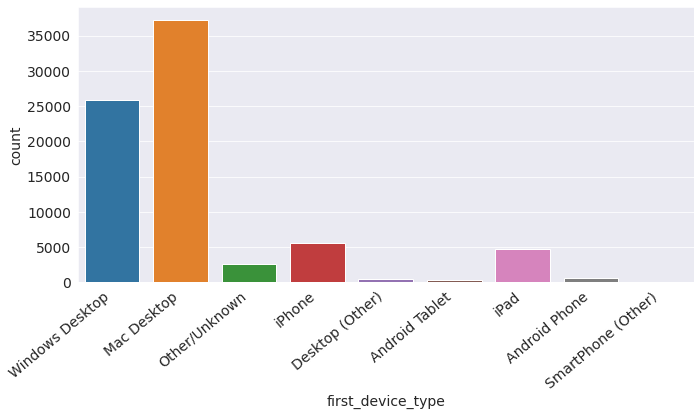

In [291]:
ax=sns.countplot(new_df.first_device_type, x='first_device_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()



Most users utilise Mac Desktop

In [292]:
jovian.commit(project="machine-learning-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


Committed successfully! https://jovian.ai/dibyababu105/machine-learning-project


'https://jovian.ai/dibyababu105/machine-learning-project'

## Feature Engineering

In [293]:
import datetime

In [294]:
new_df['date_account_created'] = pd.to_datetime(new_df['date_account_created'])
new_df['timestamp_first_active'] = pd.to_datetime(new_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [295]:
new_df['year'] = new_df['date_account_created'].dt.year

Text(0.5, 1.0, 'year wise distribution')

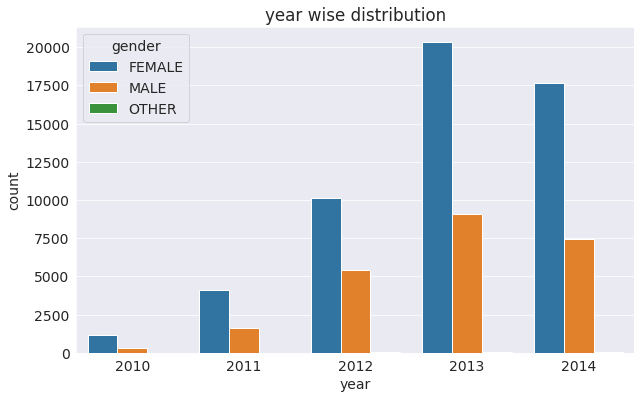

In [296]:
sns.countplot(data=new_df,x='year', hue=new_df['gender']);
plt.title('year wise distribution')

2013 had the most tourists

In [297]:
new_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,year
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2010
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,FEMALE,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2010
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,FEMALE,33.0,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,2010
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,7plqriggxp,2014-06-30,2014-06-30 23:01:36,2014-06-30,FEMALE,55.0,basic,0,en,sem-brand,google,omg,Web,Android Tablet,IE,FR,2014
213439,msucfwmlzc,2014-06-30,2014-06-30 23:47:29,2015-03-16,MALE,43.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US,2014
213441,omlc9iku7t,2014-06-30,2014-06-30 23:51:51,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES,2014
213443,0k26r3mir0,2014-06-30,2014-06-30 23:53:40,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US,2014


In [298]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['date_first_booking'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [299]:
split_date(new_df)

In [300]:
new_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,signup_app,first_device_type,first_browser,country_destination,year,Date,Year,Month,Day,WeekOfYear
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,Web,Windows Desktop,IE,US,2010,2010-08-02,2010,8,2,31
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,FEMALE,41.0,basic,0,en,direct,...,Web,Mac Desktop,Chrome,US,2010,2010-02-18,2010,2,18,7
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,FEMALE,33.0,basic,0,en,other,...,Web,Mac Desktop,Chrome,US,2010,2010-01-02,2010,1,2,53
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,...,Web,Mac Desktop,Safari,US,2010,2010-01-05,2010,1,5,1
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,...,Web,Mac Desktop,Safari,US,2010,2010-01-13,2010,1,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,7plqriggxp,2014-06-30,2014-06-30 23:01:36,2014-06-30,FEMALE,55.0,basic,0,en,sem-brand,...,Web,Android Tablet,IE,FR,2014,2014-06-30,2014,6,30,27
213439,msucfwmlzc,2014-06-30,2014-06-30 23:47:29,2015-03-16,MALE,43.0,basic,0,en,direct,...,Web,Windows Desktop,Firefox,US,2014,2015-03-16,2015,3,16,12
213441,omlc9iku7t,2014-06-30,2014-06-30 23:51:51,2014-08-13,FEMALE,34.0,basic,0,en,direct,...,Web,Mac Desktop,Chrome,ES,2014,2014-08-13,2014,8,13,33
213443,0k26r3mir0,2014-06-30,2014-06-30 23:53:40,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,...,Web,Mac Desktop,Safari,US,2014,2014-07-13,2014,7,13,28


In [301]:
new_df['timestamp_first_active'] = pd.to_datetime(new_df['timestamp_first_active'])
    

In [302]:
new_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,signup_app,first_device_type,first_browser,country_destination,year,Date,Year,Month,Day,WeekOfYear
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,Web,Windows Desktop,IE,US,2010,2010-08-02,2010,8,2,31
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,FEMALE,41.0,basic,0,en,direct,...,Web,Mac Desktop,Chrome,US,2010,2010-02-18,2010,2,18,7
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,FEMALE,33.0,basic,0,en,other,...,Web,Mac Desktop,Chrome,US,2010,2010-01-02,2010,1,2,53
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,...,Web,Mac Desktop,Safari,US,2010,2010-01-05,2010,1,5,1
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,...,Web,Mac Desktop,Safari,US,2010,2010-01-13,2010,1,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,7plqriggxp,2014-06-30,2014-06-30 23:01:36,2014-06-30,FEMALE,55.0,basic,0,en,sem-brand,...,Web,Android Tablet,IE,FR,2014,2014-06-30,2014,6,30,27
213439,msucfwmlzc,2014-06-30,2014-06-30 23:47:29,2015-03-16,MALE,43.0,basic,0,en,direct,...,Web,Windows Desktop,Firefox,US,2014,2015-03-16,2015,3,16,12
213441,omlc9iku7t,2014-06-30,2014-06-30 23:51:51,2014-08-13,FEMALE,34.0,basic,0,en,direct,...,Web,Mac Desktop,Chrome,ES,2014,2014-08-13,2014,8,13,33
213443,0k26r3mir0,2014-06-30,2014-06-30 23:53:40,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,...,Web,Mac Desktop,Safari,US,2014,2014-07-13,2014,7,13,28


In [303]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77534 entries, 2 to 213445
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       77534 non-null  object        
 1   date_account_created     77534 non-null  datetime64[ns]
 2   timestamp_first_active   77534 non-null  datetime64[ns]
 3   date_first_booking       77534 non-null  object        
 4   gender                   77534 non-null  object        
 5   age                      77534 non-null  float64       
 6   signup_method            77534 non-null  object        
 7   signup_flow              77534 non-null  int64         
 8   language                 77534 non-null  object        
 9   affiliate_channel        77534 non-null  object        
 10  affiliate_provider       77534 non-null  object        
 11  first_affiliate_tracked  75918 non-null  object        
 12  signup_app               77534 

In [304]:
new_df['date_first_booking']= pd.to_datetime(new_df['date_first_booking'])

In [305]:
new_df['elapsed_time'] = (new_df['date_first_booking'] - new_df['timestamp_first_active']).dt.total_seconds().abs()

Total time taken to decide the destination may be crucial

In [306]:
new_df['elapsed_time'].describe()

count    7.753400e+04
mean     3.804980e+06
std      7.632904e+06
min      1.000000e+00
25%      3.728550e+04
50%      1.878625e+05
75%      2.413694e+06
max      1.182188e+08
Name: elapsed_time, dtype: float64

In [307]:
new_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_device_type,first_browser,country_destination,year,Date,Year,Month,Day,WeekOfYear,elapsed_time
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,Windows Desktop,IE,US,2010,2010-08-02,2010,8,2,31,36118033.0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,FEMALE,41.0,basic,0,en,direct,...,Mac Desktop,Chrome,US,2010,2010-02-18,2010,2,18,7,6198535.0
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,FEMALE,33.0,basic,0,en,other,...,Mac Desktop,Chrome,US,2010,2010-01-02,2010,1,2,53,7421.0
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,...,Mac Desktop,Safari,US,2010,2010-01-05,2010,1,5,1,254042.0
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,...,Mac Desktop,Safari,US,2010,2010-01-13,2010,1,13,2,794455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,7plqriggxp,2014-06-30,2014-06-30 23:01:36,2014-06-30,FEMALE,55.0,basic,0,en,sem-brand,...,Android Tablet,IE,FR,2014,2014-06-30,2014,6,30,27,82896.0
213439,msucfwmlzc,2014-06-30,2014-06-30 23:47:29,2015-03-16,MALE,43.0,basic,0,en,direct,...,Windows Desktop,Firefox,US,2014,2015-03-16,2015,3,16,12,22291951.0
213441,omlc9iku7t,2014-06-30,2014-06-30 23:51:51,2014-08-13,FEMALE,34.0,basic,0,en,direct,...,Mac Desktop,Chrome,ES,2014,2014-08-13,2014,8,13,33,3715689.0
213443,0k26r3mir0,2014-06-30,2014-06-30 23:53:40,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,...,Mac Desktop,Safari,US,2014,2014-07-13,2014,7,13,28,1037180.0


In [308]:
new_df.columns.unique()

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'year', 'Date', 'Year', 'Month',
       'Day', 'WeekOfYear', 'elapsed_time'],
      dtype='object')

## **Imputing, Scaling and Encoding**

In [309]:
!pip install scikit-learn --upgrade --quiet

In [310]:
from sklearn.model_selection import train_test_split

In [311]:
train_df, val_df = train_test_split(new_df, test_size=0.15, random_state=42)

In [312]:
train_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_device_type,first_browser,country_destination,year,Date,Year,Month,Day,WeekOfYear,elapsed_time
55362,3c2se1xjra,2013-01-10,2013-01-10 05:43:34,2013-08-19,FEMALE,33.0,basic,0,en,sem-brand,...,Mac Desktop,Chrome,US,2013,2013-08-19,2013,8,19,34,19073786.0
137517,i5d1749c93,2014-01-03,2014-01-03 00:15:44,2014-01-03,MALE,31.0,basic,0,en,sem-non-brand,...,Mac Desktop,Safari,US,2014,2014-01-03,2014,1,3,1,944.0
115643,zr4mh9a118,2013-10-09,2013-10-09 23:40:03,2013-10-10,MALE,72.0,basic,0,en,direct,...,Mac Desktop,Firefox,US,2013,2013-10-10,2013,10,10,41,1197.0
35202,24c3wppam5,2012-08-06,2012-08-06 04:43:51,2012-08-06,FEMALE,43.0,facebook,3,en,content,...,Windows Desktop,IE,US,2012,2012-08-06,2012,8,6,32,17031.0
44038,a0thv5c1y5,2012-10-08,2012-10-08 20:22:05,2012-10-09,FEMALE,31.0,facebook,0,en,direct,...,Mac Desktop,Firefox,US,2012,2012-10-09,2012,10,9,41,13075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12252,eoarzki7rg,2011-11-08,2011-11-08 06:00:09,2011-11-18,MALE,68.0,facebook,2,en,direct,...,Other/Unknown,-unknown-,US,2011,2011-11-18,2011,11,18,46,842391.0
144799,m3ulyves3s,2014-01-22,2014-01-22 18:11:53,2014-02-04,MALE,42.0,basic,0,en,direct,...,Mac Desktop,Safari,US,2014,2014-02-04,2014,2,4,6,1057687.0
211156,rjx5m0dhtc,2014-06-26,2014-06-26 18:13:40,2014-06-27,MALE,41.0,basic,0,en,direct,...,Mac Desktop,Chrome,US,2014,2014-06-27,2014,6,27,26,20780.0
1600,oeb8a38vp4,2010-09-03,2010-09-03 06:27:13,2010-09-12,FEMALE,59.0,basic,3,en,direct,...,Mac Desktop,Safari,FR,2010,2010-09-12,2010,9,12,36,754367.0


In [313]:
val_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_device_type,first_browser,country_destination,year,Date,Year,Month,Day,WeekOfYear,elapsed_time
183139,nl60xpeabe,2014-05-01,2014-05-01 18:06:36,2014-06-07,FEMALE,31.0,basic,0,en,other,...,Windows Desktop,Firefox,US,2014,2014-06-07,2014,6,7,23,3131604.0
183870,9ake5pesag,2014-05-03,2014-05-03 05:07:51,2014-05-04,MALE,39.0,basic,0,en,direct,...,Mac Desktop,Chrome,ES,2014,2014-05-04,2014,5,4,18,67929.0
30015,5i8m0osvyh,2012-07-01,2012-07-01 18:10:34,2013-05-07,FEMALE,34.0,basic,12,en,api,...,Mac Desktop,Safari,GB,2012,2013-05-07,2013,5,7,19,26718566.0
110064,qom4xa8joj,2013-09-22,2013-09-22 22:06:32,2013-09-22,MALE,64.0,basic,0,en,sem-brand,...,Mac Desktop,Safari,US,2013,2013-09-22,2013,9,22,38,79592.0
145748,e9o0xy6hu5,2014-01-25,2014-01-25 03:34:37,2014-01-25,FEMALE,56.0,basic,0,en,sem-brand,...,Mac Desktop,Chrome,US,2014,2014-01-25,2014,1,25,4,12877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126286,wetpfwfo5g,2013-11-20,2013-11-20 20:42:23,2013-12-06,MALE,31.0,basic,0,en,direct,...,Mac Desktop,Chrome,US,2013,2013-12-06,2013,12,6,49,1307857.0
171319,y3wea6fqve,2014-04-03,2014-04-03 18:51:48,2014-04-03,FEMALE,28.0,basic,0,en,sem-brand,...,Mac Desktop,Safari,US,2014,2014-04-03,2014,4,3,14,67908.0
125549,gjow1bwnb7,2013-11-18,2013-11-18 16:10:29,2014-05-01,FEMALE,33.0,basic,0,en,direct,...,Mac Desktop,Firefox,IT,2013,2014-05-01,2014,5,1,18,14111371.0
126738,ez3wpg4y32,2013-11-22,2013-11-22 06:48:36,2014-07-02,FEMALE,21.0,basic,0,en,direct,...,Mac Desktop,Safari,CA,2013,2014-07-02,2014,7,2,27,19156284.0


In [314]:
train_df.columns.unique()

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'year', 'Date', 'Year', 'Month',
       'Day', 'WeekOfYear', 'elapsed_time'],
      dtype='object')

In [315]:
train_targets=train_df['country_destination']
val_targets=val_df['country_destination']
train_df= train_df.drop(columns=['id', 'date_account_created','timestamp_first_active','date_first_booking','country_destination'])
val_df= val_df.drop(columns=['id', 'date_account_created','timestamp_first_active','date_first_booking','country_destination'])




In [316]:
numeric_cols=train_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_df.select_dtypes('object').columns.tolist()

In [317]:
numeric_cols

['age',
 'signup_flow',
 'year',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'elapsed_time']

In [318]:
categorical_cols

['gender',
 'signup_method',
 'language',
 'affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'signup_app',
 'first_device_type',
 'first_browser']

In [319]:
train_df[numeric_cols].isna().sum()

age             0
signup_flow     0
year            0
Year            0
Month           0
Day             0
WeekOfYear      0
elapsed_time    0
dtype: int64

In [320]:
train_df[numeric_cols].describe().loc[['min','max']]

,age,signup_flow,year,Year,Month,Day,WeekOfYear,elapsed_time
min,15.0,0.0,2010.0,2010.0,1.0,1.0,1.0,1.0
max,80.0,25.0,2014.0,2015.0,12.0,31.0,53.0,118218781.0


In [321]:
from sklearn.preprocessing import MinMaxScaler

In [322]:
scaler=MinMaxScaler().fit(train_df[numeric_cols])

In [323]:
train_df[numeric_cols]=scaler.transform(train_df[numeric_cols])
val_df[numeric_cols]=scaler.transform(val_df[numeric_cols])

In [324]:
train_df[numeric_cols].describe().loc[['min','max']]

,age,signup_flow,year,Year,Month,Day,WeekOfYear,elapsed_time
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [325]:
train_df[categorical_cols].nunique()

gender                      3
signup_method               3
language                   22
affiliate_channel           8
affiliate_provider         16
first_affiliate_tracked     7
signup_app                  4
first_device_type           9
first_browser              35
dtype: int64

In [326]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(train_df[categorical_cols])
encoder.categories_

[array(['FEMALE', 'MALE', 'OTHER'], dtype=object),
 array(['basic', 'facebook', 'google'], dtype=object),
 array(['ca', 'cs', 'da', 'de', 'el', 'en', 'es', 'fi', 'fr', 'hu', 'it',
        'ja', 'ko', 'nl', 'no', 'pl', 'pt', 'ru', 'sv', 'th', 'tr', 'zh'],
       dtype=object),
 array(['api', 'content', 'direct', 'other', 'remarketing', 'sem-brand',
        'sem-non-brand', 'seo'], dtype=object),
 array(['baidu', 'bing', 'craigslist', 'direct', 'email-marketing',
        'facebook', 'facebook-open-graph', 'google', 'gsp', 'meetup',
        'naver', 'other', 'padmapper', 'vast', 'yahoo', 'yandex'],
       dtype=object),
 array(['linked', 'local ops', 'marketing', 'omg', 'product',
        'tracked-other', 'untracked', nan], dtype=object),
 array(['Android', 'Moweb', 'Web', 'iOS'], dtype=object),
 array(['Android Phone', 'Android Tablet', 'Desktop (Other)',
        'Mac Desktop', 'Other/Unknown', 'SmartPhone (Other)',
        'Windows Desktop', 'iPad', 'iPhone'], dtype=object),
 array(['-u

In [327]:
encoded_cols=list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['gender_FEMALE', 'gender_MALE', 'gender_OTHER', 'signup_method_basic', 'signup_method_facebook', 'signup_method_google', 'language_ca', 'language_cs', 'language_da', 'language_de', 'language_el', 'language_en', 'language_es', 'language_fi', 'language_fr', 'language_hu', 'language_it', 'language_ja', 'language_ko', 'language_nl', 'language_no', 'language_pl', 'language_pt', 'language_ru', 'language_sv', 'language_th', 'language_tr', 'language_zh', 'affiliate_channel_api', 'affiliate_channel_content', 'affiliate_channel_direct', 'affiliate_channel_other', 'affiliate_channel_remarketing', 'affiliate_channel_sem-brand', 'affiliate_channel_sem-non-brand', 'affiliate_channel_seo', 'affiliate_provider_baidu', 'affiliate_provider_bing', 'affiliate_provider_craigslist', 'affiliate_provider_direct', 'affiliate_provider_email-marketing', 'affiliate_provider_facebook', 'affiliate_provider_facebook-open-graph', 'affiliate_provider_google', 'affiliate_provider_gsp', 'affiliate_provider_meetup', 'af

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [328]:
train_df[encoded_cols]=encoder.transform(train_df[categorical_cols])
val_df[encoded_cols]=encoder.transform(val_df[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [329]:
train_inputs=train_df[numeric_cols+encoded_cols]
val_inputs=val_df[numeric_cols+encoded_cols]

In [330]:
train_inputs

,age,signup_flow,year,Year,Month,Day,WeekOfYear,elapsed_time,gender_FEMALE,gender_MALE,...,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_wOSBrowser
55362,0.276923,0.00,0.75,0.6,0.636364,0.600000,0.634615,0.161343,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137517,0.246154,0.00,1.00,0.8,0.000000,0.066667,0.000000,0.000008,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115643,0.876923,0.00,0.75,0.6,0.818182,0.300000,0.769231,0.000010,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35202,0.430769,0.12,0.50,0.4,0.636364,0.166667,0.596154,0.000144,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44038,0.246154,0.00,0.50,0.4,0.818182,0.266667,0.769231,0.000111,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12252,0.815385,0.08,0.25,0.2,0.909091,0.566667,0.865385,0.007126,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144799,0.415385,0.00,1.00,0.8,0.090909,0.100000,0.096154,0.008947,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211156,0.400000,0.00,1.00,0.8,0.454545,0.866667,0.480769,0.000176,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1600,0.676923,0.12,0.00,0.0,0.727273,0.366667,0.673077,0.006381,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Training the model**

Here two models are used to train namely Random Forest Classifier and XgbClassifier


In [331]:
from sklearn.ensemble import RandomForestClassifier

In [332]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [333]:
model.fit(train_inputs, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [334]:
model.score(train_inputs, train_targets)

0.999969652367874

In [335]:
model.score(val_inputs, val_targets)

0.7813601581979194

In [336]:
train_probs = model.predict_proba(train_inputs)
train_probs

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.93],
       [0.02, 0.01, 0.  , ..., 0.  , 0.  , 0.86],
       [0.  , 0.04, 0.01, ..., 0.02, 0.  , 0.84],
       ...,
       [0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.89],
       [0.  , 0.  , 0.01, ..., 0.  , 0.  , 0.26],
       [0.  , 0.01, 0.  , ..., 0.01, 0.  , 0.9 ]])

In [337]:
train_preds = model.predict(train_inputs)
train_preds


array(['US', 'US', 'US', ..., 'US', 'FR', 'US'], dtype=object)

In [338]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

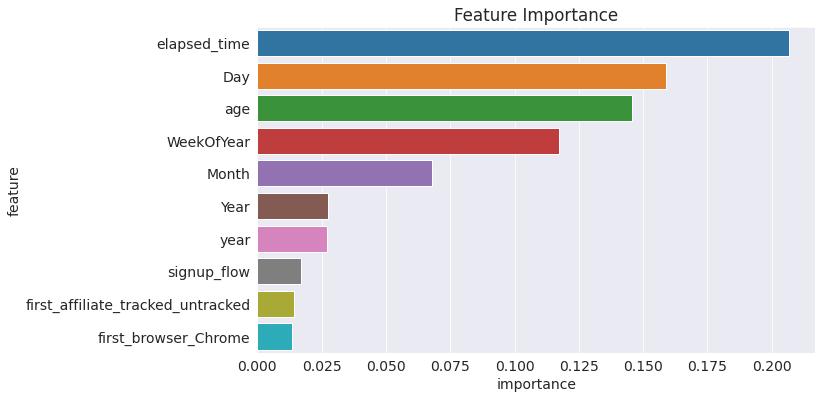

In [339]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

It seems elapsed time was an played an important factor in deciding the destination.

In [340]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    return model.score(train_inputs, train_targets), model.score(val_inputs, val_targets)

In [341]:
jovian.commit(project="machine-learning-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dibyababu105/machine-learning-project


'https://jovian.ai/dibyababu105/machine-learning-project'

## **Hyperparameters tuning**

In [342]:
test_params( n_estimators=100)

(0.999969652367874, 0.7813601581979194)

In [343]:
test_params( n_estimators=200)

(1.0, 0.7814461353280028)

In [344]:
test_params(max_depth=5)

(0.792407022442074, 0.785830968962256)

In [345]:
test_params(max_depth=10)

(0.792407022442074, 0.785830968962256)

In [346]:
test_params(max_leaf_nodes=2**5)

(0.792407022442074, 0.785830968962256)

In [347]:
test_params(max_leaf_nodes=2**15)

(0.999969652367874, 0.7811882039377526)

In [348]:
test_params(max_features=6)

(0.999908957103622, 0.7789527985555842)

In [349]:
test_params(max_features=9)

(0.999924130919685, 0.7805003868970853)

In [350]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.792452543890263, 0.785830968962256)

In [351]:
test_params(min_samples_split=100, min_samples_leaf=40)

(0.792407022442074, 0.785830968962256)

In [352]:
jovian.commit(project="machine-learning-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dibyababu105/machine-learning-project


'https://jovian.ai/dibyababu105/machine-learning-project'

In [353]:
model1 = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=100,max_depth=5,max_leaf_nodes=2**5,max_features=9)

In [354]:
model1.fit(train_inputs, train_targets)

RandomForestClassifier(max_depth=5, max_features=9, max_leaf_nodes=32,
                       n_jobs=-1, random_state=42)

In [355]:
model1.score(val_inputs, val_targets)

0.785830968962256

Thus the best score from validation set is 78.58%

In [356]:
jovian.commit(project="machine-learning-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dibyababu105/machine-learning-project


'https://jovian.ai/dibyababu105/machine-learning-project'

In [357]:
from xgboost import XGBClassifier



In [358]:
from xgboost.sklearn import XGBClassifier
def test_hparams(**params):
    Model = XGBClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    return Model.score(train_inputs, train_targets), Model.score(val_inputs, val_targets)


In [374]:
Model.score(train_inputs, train_targets)

0.792467717706326

In [375]:
Model.score(val_inputs, val_targets)

0.785830968962256

In [359]:
test_hparams(n_estimators=10)

(0.792407022442074, 0.785830968962256)

In [360]:
test_hparams(n_estimators=30)

(0.792407022442074, 0.785830968962256)

In [361]:
test_hparams(n_estimators=100)

(0.792467717706326, 0.785830968962256)

In [362]:
test_hparams(max_depth=2)


(0.792407022442074, 0.785830968962256)

In [363]:
test_hparams(max_depth=5)

(0.79304432271672, 0.7855730375720058)

In [364]:
test_hparams(max_depth=10)


(0.8037722106732622, 0.7855730375720058)

In [365]:
test_hparams(n_estimators=50, learning_rate=0.1)


(0.792407022442074, 0.785830968962256)

In [366]:
test_hparams(n_estimators=50, learning_rate=0.3)

(0.792513239154515, 0.785830968962256)

In [367]:
test_hparams(n_estimators=50, learning_rate=0.5)

(0.7926801511312079, 0.7855730375720058)

In [373]:
Model= XGBClassifier(random_state=42, n_jobs=-1,).fit(train_inputs, train_targets)
Model.predict(train_inputs)

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

In [369]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': Model.feature_importances_
}).sort_values('importance', ascending=False)

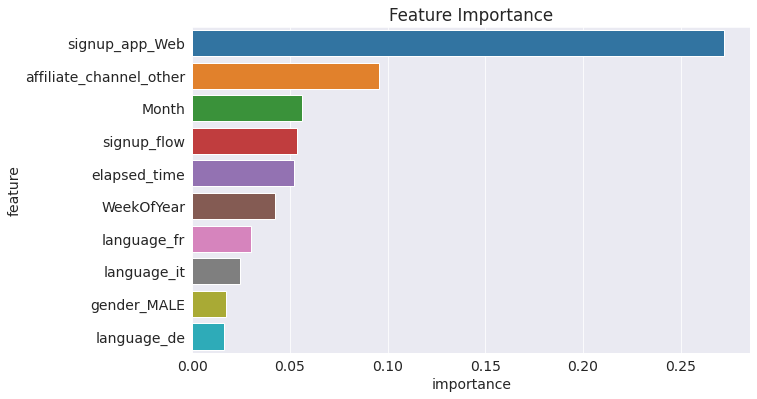

In [370]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [371]:
jovian.commit(project="machine-learning-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dibyababu105/machine-learning-project


'https://jovian.ai/dibyababu105/machine-learning-project'

### Before Hyperparameters tuning model shows accuracy of 78.1% on validation set and after hyperparamters tuning model shows accuracy of 78.5%.

### Conclusion 

Downloading the dataset and converting the CSV file into a Pandas DataFrame are the first steps.
2. The dataset has been cleaned in accordance with our needs.
3. The dataset has been divided into a training set and a validation set.
4. To prepare our dataset for the training model, we performed Imputation, Scaling, and One Hot Encoder.
5. We have created a decision tree model and a XgbClassifier model.
6. We have adjusted the hyperparameters using the maximum leaf nodes and depth.
**

In [376]:
jovian.submit(assignment="zerotogbms-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dibyababu105/machine-learning-project
[jovian] Submitting assignment..


[jovian] Error: Jovian submit failed. (HTTP 400) “https://jovian.ai/dibyababu105/machine-learning-project” is a Private Notebook, please change it to Public/Secret and submit again.
